# Предподготовка данных

In [1]:
# # Предподготовка данных

import pandas as pd
df=pd.read_csv('C:\csv\Lesson_1_insurance.csv')
display(df.head())

df['sex']=df['sex'].fillna('Unknown')
df['smoker'].fillna('Unknown', inplace=True)
df['region'].fillna('Unknown', inplace=True)


,age,sex,bmi,children,smoker,region,charges
0,37.0,male,34.20,1.0,yes,northeast,39047.2850
1,35.0,female,43.34,2.0,no,southeast,5846.9176
2,62.0,male,NaN,50.0,NaN,southeast,NaN
3,53.0,female,26.70,2.0,no,southwest,11150.7800
4,59.0,female,27.83,3.0,no,southeast,14001.2867


50.0


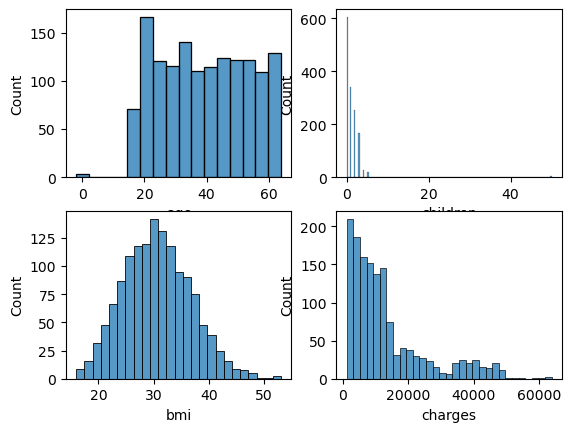

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes=plt.subplots(2,2)                         # Строим 4 гистограммы (2х2) 
sns.histplot(df,x='age', ax=axes[0,0])
sns.histplot(df,x='children', ax=axes[0,1])
sns.histplot(df,x='bmi', ax=axes[1,0])
sns.histplot(df,x='charges', ax=axes[1,1])
df.isnull().sum()                                   # Смотрим сколько пропусков в Датафрейме
print(df['children'].max())                         # Видим что "50" детей - это статистический выброс


In [4]:
bmi_mean = df['bmi'].mean()              # вызываем метод подсчета среднего
df['bmi'].fillna(bmi_mean, inplace=True) # заменяем исходный датафрейм (столбец df['bmi']) новым


# Так как children и age это целочисленные признаки, заполним эти столбцы значениями медианы:
df['age'].fillna(df['age'].median(), inplace=True) # сразу положим медиану, как  value аргумент

df.describe()             # Смотрим структуру колонок (мах, мин, процентили и т.д.)
                          # Более 75% значений находится в отрезке [0, 16500], оставшиеся значения могут выступать 
                          # в роли выбросов при расчете среднего. 

df['charges'].mean(), df['charges'].median() # Сравним среднее значение и медиану:Как можно заметить, 
                                             # среднее значение менее устойчиво к выбросам данного распределения. 
   
df['charges'].fillna(df['charges'].median(), inplace=True)     # Давайте заполним пропуски медианой:

# Как минимум у 75% данных величина переменной равна всего 2, однако у переменной children максимальное значение 
# равняется 50 — это можно считать выбросом. Давайте удалим строки со значением 50, но перед этим скопируем наш датасет. 
# Так мы всегда сможем вернуться к исходному состоянию датафрейма:
df_origin = df.copy()          # создадим переменную df_origin и воспользуемся методом pandas.DataFrame.copy(), 
                               # который возвращает полную копию объекта
    
index_of_anomaly = df[df.children == 50].index  # index — свойство класса pandas.DataFrame, которое возвращает индексы таблицы
                                                # len(index_of_anomaly) -> таких записей 3 шт [2, 170, 1356]
print(len(index_of_anomaly))
df.drop(index_of_anomaly, inplace=True)  # аналогично с .dropna(),  аргумент inplace=True заменяет исходный датафрейм, 
                                         # а не возвращает копию
    
df.max()               # Смотрим максимальные значения колокон Датафрейма

# В наших данных встречается также отрицательный возраст — строки с таким возрастом тоже можно удалить:
index_of_age_anomaly = df[df.age == -2].index
df.drop(index_of_age_anomaly, inplace=True)

df.min()               # Смотрим минимальное значения колокон Датафрейма

0


age              18.0
sex           Unknown
bmi             15.96
children          0.0
smoker        Unknown
region        Unknown
charges     1121.8739
dtype: object

# Удаление дубликатов

<Axes: xlabel='charges', ylabel='Count'>

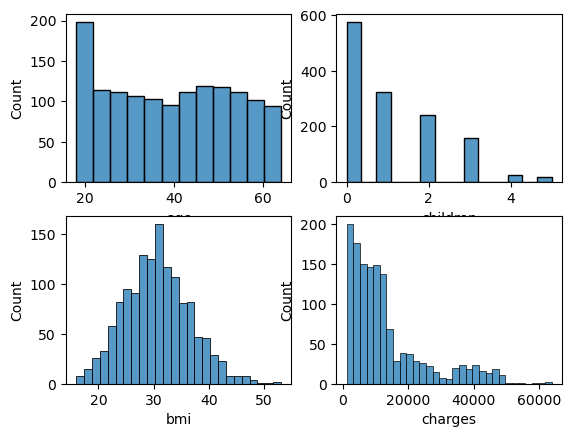

In [11]:
df.duplicated()   # Проверяем на наличие дубликатов 

# Поскольку мы получили значения формата True и False, можно с легкостью применить команду df[df.duplicated()] к датафрейму
# и получить дублирующиеся строки: (71 строка)
df[df.duplicated()]

# Кроме этого, с помощью отрицания или инвертирования данных значений, используя ~ в записи df[~df.duplicated()], 
# можно получить датафрейм без полных дубликатов: (1386 строк)
df[~df.duplicated()]


df.duplicated(subset=['age'])       # Чтобы найти дубликаты в определенных столбцах, используем свойство subset:

df.drop_duplicates(inplace = True)  # Удалить дубликаты из датафрейма

fig, axes=plt.subplots(2,2)                         # Строим 4 гистограммы (2х2) 
sns.histplot(df,x='age', ax=axes[0,0])
sns.histplot(df,x='children', ax=axes[0,1])
sns.histplot(df,x='bmi', ax=axes[1,0])
sns.histplot(df,x='charges', ax=axes[1,1])